In [1]:
# below this part is the prediction using the xgboost package.
%matplotlib inline
import pandas as pd
from datetime import datetime
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.linear_model import LinearRegression, Ridge,BayesianRidge
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import mean_squared_error
from math import radians, cos, sin, asin, sqrt,pi
import seaborn as sns
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from collections import Counter

plt.rcParams['figure.figsize'] = [16, 10]



In [2]:
data_train = pd.read_csv('train_processed.csv')

In [3]:
data_train.head()

,Unnamed: 0,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,...,dropN_40,dropN_41,dropN_42,dropN_43,dropN_44,dropN_45,dropN_46,dropN_47,dropN_48,dropN_49
0,0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,...,0,0,0,0,0,0,0,0,0,0
1,1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,...,0,0,0,0,0,0,0,0,0,0
2,2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,...,0,0,0,0,0,0,0,0,0,0
3,3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,...,0,0,0,0,0,0,0,0,0,0
4,4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,...,0,0,0,0,0,0,0,0,0,0


In [4]:
pd.set_option('display.max_columns', None)
data_train.head()


,Unnamed: 0,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,day_of_month,month,hour_of_day,weekday,haversine_dist,manhattan_dist,vi_1,vi_2,pc_0,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,sf_N,sf_Y,m_1,m_2,m_3,m_4,m_5,m_6,dom_1,dom_2,dom_3,dom_4,dom_5,dom_6,dom_7,dom_8,dom_9,dom_10,dom_11,dom_12,dom_13,dom_14,dom_15,dom_16,dom_17,dom_18,dom_19,dom_20,dom_21,dom_22,dom_23,dom_24,dom_25,dom_26,dom_27,dom_28,dom_29,dom_30,dom_31,h_0,h_1,h_2,h_3,h_4,h_5,h_6,h_7,h_8,h_9,h_10,h_11,h_12,h_13,h_14,h_15,h_16,h_17,h_18,h_19,h_20,h_21,h_22,h_23,wd_0,wd_1,wd_2,wd_3,wd_4,wd_5,wd_6,pickN_0,pickN_1,pickN_2,pickN_3,pickN_4,pickN_5,pickN_6,pickN_7,pickN_8,pickN_9,pickN_10,pickN_11,pickN_12,pickN_13,pickN_14,pickN_15,pickN_16,pickN_17,pickN_18,pickN_19,pickN_20,pickN_21,pickN_22,pickN_23,pickN_24,pickN_25,pickN_26,pickN_27,pickN_28,pickN_29,pickN_30,pickN_31,pickN_32,pickN_33,pickN_34,pickN_35,pickN_36,pickN_37,pickN_38,pickN_39,pickN_40,pickN_41,pickN_42,pickN_43,pickN_44,pickN_45,pickN_46,pickN_47,pickN_48,pickN_49,dropN_0,dropN_1,dropN_2,dropN_3,dropN_4,dropN_5,dropN_6,dropN_7,dropN_8,dropN_9,dropN_10,dropN_11,dropN_12,dropN_13,dropN_14,dropN_15,dropN_16,dropN_17,dropN_18,dropN_19,dropN_20,dropN_21,dropN_22,dropN_23,dropN_24,dropN_25,dropN_26,dropN_27,dropN_28,dropN_29,dropN_30,dropN_31,dropN_32,dropN_33,dropN_34,dropN_35,dropN_36,dropN_37,dropN_38,dropN_39,dropN_40,dropN_41,dropN_42,dropN_43,dropN_44,dropN_45,dropN_46,dropN_47,dropN_48,dropN_49
0,0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,14,3,17,0,1.498521,1.735433,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,12,6,0,6,1.805507,2.430506,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,19,1,11,1,6.385098,8.203575,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,6,4,19,2,1.485498,1.661331,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,26,3,13,5,1.188588,1.199457,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [5]:
data_train.describe()

,Unnamed: 0,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,day_of_month,month,hour_of_day,weekday,haversine_dist,manhattan_dist,vi_1,vi_2,pc_0,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,sf_N,sf_Y,m_1,m_2,m_3,m_4,m_5,m_6,dom_1,dom_2,dom_3,dom_4,dom_5,dom_6,dom_7,dom_8,dom_9,dom_10,dom_11,dom_12,dom_13,dom_14,dom_15,dom_16,dom_17,dom_18,dom_19,dom_20,dom_21,dom_22,dom_23,dom_24,dom_25,dom_26,dom_27,dom_28,dom_29,dom_30,dom_31,h_0,h_1,h_2,h_3,h_4,h_5,h_6,h_7,h_8,h_9,h_10,h_11,h_12,h_13,h_14,h_15,h_16,h_17,h_18,h_19,h_20,h_21,h_22,h_23,wd_0,wd_1,wd_2,wd_3,wd_4,wd_5,wd_6,pickN_0,pickN_1,pickN_2,pickN_3,pickN_4,pickN_5,pickN_6,pickN_7,pickN_8,pickN_9,pickN_10,pickN_11,pickN_12,pickN_13,pickN_14,pickN_15,pickN_16,pickN_17,pickN_18,pickN_19,pickN_20,pickN_21,pickN_22,pickN_23,pickN_24,pickN_25,pickN_26,pickN_27,pickN_28,pickN_29,pickN_30,pickN_31,pickN_32,pickN_33,pickN_34,pickN_35,pickN_36,pickN_37,pickN_38,pickN_39,pickN_40,pickN_41,pickN_42,pickN_43,pickN_44,pickN_45,pickN_46,pickN_47,pickN_48,pickN_49,dropN_0,dropN_1,dropN_2,dropN_3,dropN_4,dropN_5,dropN_6,dropN_7,dropN_8,dropN_9,dropN_10,dropN_11,dropN_12,dropN_13,dropN_14,dropN_15,dropN_16,dropN_17,dropN_18,dropN_19,dropN_20,dropN_21,dropN_22,dropN_23,dropN_24,dropN_25,dropN_26,dropN_27,dropN_28,dropN_29,dropN_30,dropN_31,dropN_32,dropN_33,dropN_34,dropN_35,dropN_36,dropN_37,dropN_38,dropN_39,dropN_40,dropN_41,dropN_42,dropN_43,dropN_44,dropN_45,dropN_46,dropN_47,dropN_48,dropN_49
count,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+06,1.439183e+

In [6]:
y_train = data_train.trip_duration
remove_column = ['Unnamed: 0','id','vendor_id','pickup_datetime','dropoff_datetime',
                  'pickup_longitude', 'pickup_latitude','dropoff_longitude',
                  'dropoff_latitude','store_and_fwd_flag','trip_duration','pickup_date',
               'day_of_month', 'month','hour_of_day','weekday']

In [7]:
x_train = data_train.drop(remove_column, axis=1)
x_train.head()
y_train

0           455
1           663
2          2124
3           429
4           435
           ... 
1439178     778
1439179     655
1439180     764
1439181     373
1439182     198
Name: trip_duration, Length: 1439183, dtype: int64

In [8]:
x_train = x_train[0:100000]
y_train = y_train[0:100000]


In [9]:
# Now do train test split
xtrain, xtest, ytrain, ytest = train_test_split(x_train, y_train, test_size=0.20, random_state=42)

In [10]:
# Now start building xgboost model
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((80000, 182), (20000, 182), (80000,), (20000,))

In [11]:
y_train[:10]

0     455
1     663
2    2124
3     429
4     435
5     443
6     341
7    1551
8     255
9    1225
Name: trip_duration, dtype: int64

In [12]:
xtrain

,passenger_count,haversine_dist,manhattan_dist,vi_1,vi_2,pc_0,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,sf_N,sf_Y,m_1,m_2,m_3,m_4,m_5,m_6,dom_1,dom_2,dom_3,dom_4,dom_5,dom_6,dom_7,dom_8,dom_9,dom_10,dom_11,dom_12,dom_13,dom_14,dom_15,dom_16,dom_17,dom_18,dom_19,dom_20,dom_21,dom_22,dom_23,dom_24,dom_25,dom_26,dom_27,dom_28,dom_29,dom_30,dom_31,h_0,h_1,h_2,h_3,h_4,h_5,h_6,h_7,h_8,h_9,h_10,h_11,h_12,h_13,h_14,h_15,h_16,h_17,h_18,h_19,h_20,h_21,h_22,h_23,wd_0,wd_1,wd_2,wd_3,wd_4,wd_5,wd_6,pickN_0,pickN_1,pickN_2,pickN_3,pickN_4,pickN_5,pickN_6,pickN_7,pickN_8,pickN_9,pickN_10,pickN_11,pickN_12,pickN_13,pickN_14,pickN_15,pickN_16,pickN_17,pickN_18,pickN_19,pickN_20,pickN_21,pickN_22,pickN_23,pickN_24,pickN_25,pickN_26,pickN_27,pickN_28,pickN_29,pickN_30,pickN_31,pickN_32,pickN_33,pickN_34,pickN_35,pickN_36,pickN_37,pickN_38,pickN_39,pickN_40,pickN_41,pickN_42,pickN_43,pickN_44,pickN_45,pickN_46,pickN_47,pickN_48,pickN_49,dropN_0,dropN_1,dropN_2,dropN_3,dropN_4,dropN_5,dropN_6,dropN_7,dropN_8,dropN_9,dropN_10,dropN_11,dropN_12,dropN_13,dropN_14,dropN_15,dropN_16,dropN_17,dropN_18,dropN_19,dropN_20,dropN_21,dropN_22,dropN_23,dropN_24,dropN_25,dropN_26,dropN_27,dropN_28,dropN_29,dropN_30,dropN_31,dropN_32,dropN_33,dropN_34,dropN_35,dropN_36,dropN_37,dropN_38,dropN_39,dropN_40,dropN_41,dropN_42,dropN_43,dropN_44,dropN_45,dropN_46,dropN_47,dropN_48,dropN_49
75220,1,2.266402,2.552027,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
48955,3,1.800774,2.483255,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
44966,3,4.427310,5.053683,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13568,2,5.047966,6.059656,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
92727,1,1.622176,2.155819,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [13]:
ytrain

75220     710
48955     621
44966     833
13568     871
92727     616
         ... 
6265      191
54886     905
76820     337
860      1064
15795     582
Name: trip_duration, Length: 80000, dtype: int64

In [14]:
xtrain =  xtrain.reset_index().drop('index',axis = 1)
ytrain = ytrain.reset_index().drop('index',axis = 1)

xtest =  xtest.reset_index().drop('index',axis = 1)
ytest = ytest.reset_index().drop('index',axis = 1)





In [15]:
dtrain = xgb.DMatrix(xtrain, label=np.log(ytrain)+1)
dvalid = xgb.DMatrix(xtest, label=np.log(ytest)+1)
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

In [16]:
x_train

,passenger_count,haversine_dist,manhattan_dist,vi_1,vi_2,pc_0,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,sf_N,sf_Y,m_1,m_2,m_3,m_4,m_5,m_6,dom_1,dom_2,dom_3,dom_4,dom_5,dom_6,dom_7,dom_8,dom_9,dom_10,dom_11,dom_12,dom_13,dom_14,dom_15,dom_16,dom_17,dom_18,dom_19,dom_20,dom_21,dom_22,dom_23,dom_24,dom_25,dom_26,dom_27,dom_28,dom_29,dom_30,dom_31,h_0,h_1,h_2,h_3,h_4,h_5,h_6,h_7,h_8,h_9,h_10,h_11,h_12,h_13,h_14,h_15,h_16,h_17,h_18,h_19,h_20,h_21,h_22,h_23,wd_0,wd_1,wd_2,wd_3,wd_4,wd_5,wd_6,pickN_0,pickN_1,pickN_2,pickN_3,pickN_4,pickN_5,pickN_6,pickN_7,pickN_8,pickN_9,pickN_10,pickN_11,pickN_12,pickN_13,pickN_14,pickN_15,pickN_16,pickN_17,pickN_18,pickN_19,pickN_20,pickN_21,pickN_22,pickN_23,pickN_24,pickN_25,pickN_26,pickN_27,pickN_28,pickN_29,pickN_30,pickN_31,pickN_32,pickN_33,pickN_34,pickN_35,pickN_36,pickN_37,pickN_38,pickN_39,pickN_40,pickN_41,pickN_42,pickN_43,pickN_44,pickN_45,pickN_46,pickN_47,pickN_48,pickN_49,dropN_0,dropN_1,dropN_2,dropN_3,dropN_4,dropN_5,dropN_6,dropN_7,dropN_8,dropN_9,dropN_10,dropN_11,dropN_12,dropN_13,dropN_14,dropN_15,dropN_16,dropN_17,dropN_18,dropN_19,dropN_20,dropN_21,dropN_22,dropN_23,dropN_24,dropN_25,dropN_26,dropN_27,dropN_28,dropN_29,dropN_30,dropN_31,dropN_32,dropN_33,dropN_34,dropN_35,dropN_36,dropN_37,dropN_38,dropN_39,dropN_40,dropN_41,dropN_42,dropN_43,dropN_44,dropN_45,dropN_46,dropN_47,dropN_48,dropN_49
0,1,1.498521,1.735433,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1.805507,2.430506,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,6.385098,8.203575,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1.485498,1.661331,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1.188588,1.199457,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,2

In [17]:
dtrain

In [22]:
xgb_pars = {'min_child_weight': 50, 'eta': 0.3, 'colsample_bytree': 0.3, 'max_depth': 10,
            'subsample': 0.8, 'lambda': 1.0, 'nthread': 2, 'booster' : 'gbtree', 'silent': 1,
            'eval_metric': 'rmse', 'objective': 'reg:linear'}
model = xgb.train(xgb_pars, dtrain, 1000, watchlist, early_stopping_rounds=50,
      maximize=False, verbose_eval=1)
print('Modeling RMSE %.5f' % model.best_score)

[0]	train-rmse:4.90413	valid-rmse:4.90785
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 50 rounds.
[1]	train-rmse:3.46147	valid-rmse:3.46539
[2]	train-rmse:2.46275	valid-rmse:2.4674
[3]	train-rmse:1.75561	valid-rmse:1.7594
[4]	train-rmse:1.27121	valid-rmse:1.27441
[5]	train-rmse:0.957505	valid-rmse:0.96104
[6]	train-rmse:0.743092	valid-rmse:0.746368
[7]	train-rmse:0.616603	valid-rmse:0.620229
[8]	train-rmse:0.532675	valid-rmse:0.536316
[9]	train-rmse:0.490143	valid-rmse:0.494005
[10]	train-rmse:0.467071	valid-rmse:0.471158
[11]	train-rmse:0.44621	valid-rmse:0.451352
[12]	train-rmse:0.43798	valid-rmse:0.443083
[13]	train-rmse:0.429465	valid-rmse:0.434552
[14]	train-rmse:0.426379	valid-rmse:0.431607
[15]	train-rmse:0.423548	valid-rmse:0.429391
[16]	train-rmse:0.418027	valid-rmse:0.424445
[17]	train-rmse:0.415679	valid-rmse:0.422619
[18]	train-rmse:0.414305	valid-rmse:0.421497
[19]	train-rmse:0.411857	

[179]	train-rmse:0.350362	valid-rmse:0.396629
[180]	train-rmse:0.350242	valid-rmse:0.396469
[181]	train-rmse:0.350152	valid-rmse:0.396103
[182]	train-rmse:0.350014	valid-rmse:0.396127
[183]	train-rmse:0.349843	valid-rmse:0.3961
[184]	train-rmse:0.349693	valid-rmse:0.396065
[185]	train-rmse:0.349468	valid-rmse:0.395933
[186]	train-rmse:0.349433	valid-rmse:0.396046
[187]	train-rmse:0.349421	valid-rmse:0.396005
[188]	train-rmse:0.349245	valid-rmse:0.396095
[189]	train-rmse:0.349199	valid-rmse:0.39609
[190]	train-rmse:0.349012	valid-rmse:0.396141
[191]	train-rmse:0.348953	valid-rmse:0.396068
[192]	train-rmse:0.348797	valid-rmse:0.396022
[193]	train-rmse:0.348683	valid-rmse:0.396005
[194]	train-rmse:0.348458	valid-rmse:0.395827
[195]	train-rmse:0.348315	valid-rmse:0.396112
[196]	train-rmse:0.348255	valid-rmse:0.396166
[197]	train-rmse:0.348072	valid-rmse:0.396121
[198]	train-rmse:0.347964	valid-rmse:0.39609
[199]	train-rmse:0.347836	valid-rmse:0.396068
[200]	train-rmse:0.347687	valid-rmse:0

In [18]:
xgb_pars = {'min_child_weight': 1, 'eta': 0.5, 'colsample_bytree': 0.9, 
            'max_depth': 6,'subsample': 0.9, 'lambda': 1., 'nthread': -1, 
            'booster' : 'gbtree', 'silent': 1,'eval_metric': 'rmse', 
            'objective': 'reg:linear'}
model = xgb.train(xgb_pars, dtrain, 1000, watchlist, early_stopping_rounds=50,
      maximize=False, verbose_eval=1)
print('Modeling RMSE %.5f' % model.best_score)

[0]	train-rmse:3.51833	valid-rmse:3.5213
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 50 rounds.
[1]	train-rmse:1.80348	valid-rmse:1.80559
[2]	train-rmse:0.982274	valid-rmse:0.985082
[3]	train-rmse:0.623416	valid-rmse:0.628177
[4]	train-rmse:0.490803	valid-rmse:0.498019
[5]	train-rmse:0.447868	valid-rmse:0.456525
[6]	train-rmse:0.432268	valid-rmse:0.442876
[7]	train-rmse:0.424123	valid-rmse:0.436305
[8]	train-rmse:0.419947	valid-rmse:0.433079
[9]	train-rmse:0.415126	valid-rmse:0.429421
[10]	train-rmse:0.41146	valid-rmse:0.426749
[11]	train-rmse:0.40889	valid-rmse:0.424648
[12]	train-rmse:0.405433	valid-rmse:0.421766
[13]	train-rmse:0.402694	valid-rmse:0.419974
[14]	train-rmse:0.400883	valid-rmse:0.418871
[15]	train-rmse:0.397847	valid-rmse:0.419232
[16]	train-rmse:0.396383	valid-rmse:0.418797
[17]	train-rmse:0.393785	valid-rmse:0.416924
[18]	train-rmse:0.392288	valid-rmse:0.416327
[19]	train-rmse:0

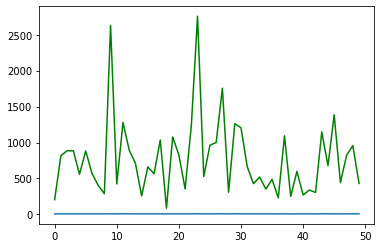

In [19]:
prediction = model.predict(dvalid)
plt.plot(prediction[:50])
plt.plot(ytest[:50],color= 'green')



In [20]:
model.quantile_score

AttributeError: 'Booster' object has no attribute 'quantile_score'

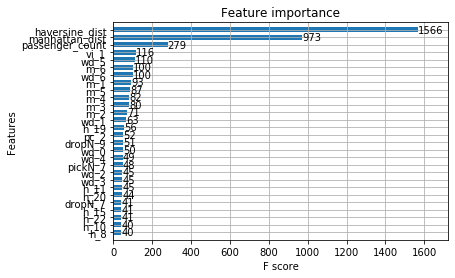

In [21]:
xgb.plot_importance(model, max_num_features=28, height=0.7)



In [141]:
# md = [6]
# lr = [0.1,0.3]
# mcw = [20,25,30]
# for m in md:
#     for l in lr:
#         for n in mcw:
#             t0 = datetime.now()
#             xgb_pars = {'min_child_weight': n, 'eta': l, 'colsample_bytree': 0.9, 
#                        'max_depth': m,
#            'subsample': 0.9, 'lambda': 1., 'nthread': -1, 'booster' : 'gbtree', 'silent': 1,
#            'eval_metric': 'rmse', 'objective': 'reg:linear'}
#             model = xgb.train(xgb_pars, dtrain, 50, watchlist, early_stopping_rounds=10,maximize=False, verbose_eval=1)

[0]	train-rmse:953.777	valid-rmse:955.152
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 10 rounds.
[1]	train-rmse:874.605	valid-rmse:875.812
[2]	train-rmse:804.729	valid-rmse:805.796
[3]	train-rmse:743.197	valid-rmse:743.981
[4]	train-rmse:689.176	valid-rmse:689.934
[5]	train-rmse:641.998	valid-rmse:642.527
[6]	train-rmse:601.194	valid-rmse:601.859
[7]	train-rmse:565.342	valid-rmse:565.768
[8]	train-rmse:534.408	valid-rmse:534.852
[9]	train-rmse:507.901	valid-rmse:508.188
[10]	train-rmse:485.111	valid-rmse:485.432
[11]	train-rmse:465.674	valid-rmse:465.814
[12]	train-rmse:448.954	valid-rmse:449.025
[13]	train-rmse:434.673	valid-rmse:435.017
[14]	train-rmse:424.533	valid-rmse:424.983
[15]	train-rmse:414.2	valid-rmse:414.534
[16]	train-rmse:405.348	valid-rmse:405.877
[17]	train-rmse:398.049	valid-rmse:398.54
[18]	train-rmse:391.848	valid-rmse:392.485
[19]	train-rmse:386.457	valid-rmse:387.322
[20]	tra

[29]	train-rmse:328.879	valid-rmse:335.965
[30]	train-rmse:327.858	valid-rmse:335.215
[31]	train-rmse:327.039	valid-rmse:334.517
[32]	train-rmse:326.149	valid-rmse:333.995
[33]	train-rmse:325.655	valid-rmse:333.723
[34]	train-rmse:325.012	valid-rmse:332.966
[35]	train-rmse:324.586	valid-rmse:332.666
[36]	train-rmse:323.935	valid-rmse:332.193
[37]	train-rmse:323.197	valid-rmse:331.722
[38]	train-rmse:322.478	valid-rmse:331.34
[39]	train-rmse:321.769	valid-rmse:330.809
[40]	train-rmse:321.06	valid-rmse:330.228
[41]	train-rmse:320.315	valid-rmse:329.964
[42]	train-rmse:319.68	valid-rmse:329.694
[43]	train-rmse:318.844	valid-rmse:329.324
[44]	train-rmse:318.011	valid-rmse:328.558
[45]	train-rmse:317.654	valid-rmse:328.382
[46]	train-rmse:317.171	valid-rmse:328.039
[47]	train-rmse:316.645	valid-rmse:327.839
[48]	train-rmse:316.029	valid-rmse:327.382
[49]	train-rmse:315.095	valid-rmse:327.006
[0]	train-rmse:780.416	valid-rmse:781.096
Multiple eval metrics have been passed: 'valid-rmse' will 

KeyboardInterrupt: 

In [24]:
log_ytrain = np.log(ytrain)+1

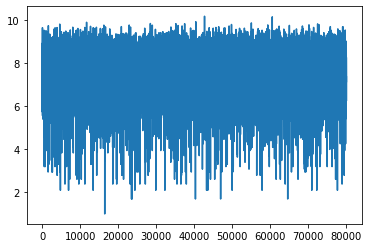

In [25]:
plt.figure()
plt.plot(log_ytrain)
plt.show()